# Deep Learning

In [95]:
# Import libraries

import numpy as np
import pandas as pd
import hvplot.pandas
from collections import Counter
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import warnings
warnings.filterwarnings('ignore')

In [96]:
# Load the cleaned hotel booking data into the workbook and convert to pandas Dataframe
csv_path = Path('../Resources/cleaned_hotel_bookings.csv')

df = pd.read_csv(csv_path)
df.head()

,Unnamed: 0,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,meal,country,market_segment,reserved_room_type,customer_type,adr,total_of_special_requests,date
0,2,Resort Hotel,7,2015,7,27,1,0,1,1,BB,GBR,Direct,A,Transient,80.0,0,2015-07-01
1,4,Resort Hotel,14,2015,7,27,1,0,2,2,BB,GBR,Online TA,A,Transient,100.0,1,2015-07-01
2,5,Resort Hotel,14,2015,7,27,1,0,2,2,BB,GBR,Online TA,A,Transient,100.0,1,2015-07-01
3,6,Resort Hotel,0,2015,7,27,1,0,2,2,BB,PRT,Direct,C,Transient,110.0,0,2015-07-01
4,7,Resort Hotel,9,2015,7,27,1,0,2,2,FB,PRT,Direct,C,Transient,100.0,1,2015-07-01


In [97]:
# Drop unamed row
df = df.drop(columns = ['Unnamed: 0'])


In [98]:
# Define features data
X = df.copy()
X = X.drop(columns=["adr"])
X.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,meal,country,market_segment,reserved_room_type,customer_type,total_of_special_requests,date
0,Resort Hotel,7,2015,7,27,1,0,1,1,BB,GBR,Direct,A,Transient,0,2015-07-01
1,Resort Hotel,14,2015,7,27,1,0,2,2,BB,GBR,Online TA,A,Transient,1,2015-07-01
2,Resort Hotel,14,2015,7,27,1,0,2,2,BB,GBR,Online TA,A,Transient,1,2015-07-01
3,Resort Hotel,0,2015,7,27,1,0,2,2,BB,PRT,Direct,C,Transient,0,2015-07-01
4,Resort Hotel,9,2015,7,27,1,0,2,2,FB,PRT,Direct,C,Transient,1,2015-07-01


In [99]:
# Define target data
y = df["adr"].values
y = y.reshape(-1, 1)
y[:5]

array([[ 80.],
       [100.],
       [100.],
       [110.],
       [100.]])

In [100]:
# import preprocessing from sklearn
from sklearn import preprocessing

In [101]:
# view columns using df.columns
X.columns

Index(['hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'meal',
       'country', 'market_segment', 'reserved_room_type', 'customer_type',
       'total_of_special_requests', 'date'],
      dtype='object')

In [102]:
# Drop date because we have week of the booking for the year
X = X.drop(columns = ['date'])

In [117]:
X.dtypes

hotel                        object
lead_time                     int64
arrival_date_year             int64
arrival_date_month            int64
arrival_date_week_number      int64
arrival_date_day_of_month     int64
stays_in_weekend_nights       int64
stays_in_week_nights          int64
adults                        int64
meal                         object
country                      object
market_segment               object
reserved_room_type           object
customer_type                object
total_of_special_requests     int64
dtype: object

In [103]:
# 1. INSTANTIATE
# encode labels with value between 0 and n_classes-1.
le = preprocessing.LabelEncoder()


# 2/3. FIT AND TRANSFORM
# use df.apply() to apply le.fit_transform to all columns
X_2 = X.apply(le.fit_transform)
X_2.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,meal,country,market_segment,reserved_room_type,customer_type,total_of_special_requests
0,1,7,0,6,26,0,0,1,1,0,57,0,0,2,0
1,1,14,0,6,26,0,0,2,2,0,57,3,0,2,1
2,1,14,0,6,26,0,0,2,2,0,57,3,0,2,1
3,1,0,0,6,26,0,0,2,2,0,132,0,2,2,0
4,1,9,0,6,26,0,0,2,2,1,132,0,2,2,1


In [104]:
X_2.dtypes

hotel                        int32
lead_time                    int64
arrival_date_year            int64
arrival_date_month           int64
arrival_date_week_number     int64
arrival_date_day_of_month    int64
stays_in_weekend_nights      int64
stays_in_week_nights         int64
adults                       int64
meal                         int32
country                      int32
market_segment               int32
reserved_room_type           int32
customer_type                int32
total_of_special_requests    int64
dtype: object

In [105]:
X_2 = np.asarray(X_2).astype(np.float32)

In [106]:
# Create training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X_2, y, random_state=2)

In [107]:
 # Create the scaler instance
X_scaler = StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the features data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [116]:
# View scaled data
X_train_scaled

array([[-0.61377466, -0.2571206 ,  1.1673548 , ..., -0.61410826,
        -0.20645933,  1.7459306 ],
       [-0.61377466,  1.3249466 , -0.252671  , ..., -0.61410826,
        -0.20645933, -0.74707294],
       [ 1.6292624 ,  0.37760097, -0.252671  , ..., -0.61410826,
         1.5206718 , -0.74707294],
       ...,
       [-0.61377466, -1.0528909 , -0.252671  , ..., -0.61410826,
        -0.20645933, -0.74707294],
       [-0.61377466, -0.5981651 ,  1.1673548 , ...,  1.1032146 ,
        -0.20645933,  1.7459306 ],
       [-0.61377466, -0.5318509 ,  1.1673548 , ..., -0.61410826,
        -0.20645933,  1.7459306 ]], dtype=float32)

In [108]:
# Define the model - shallow neural net
number_hidden_nodes = 8
number_input_features = 15

nn = Sequential()
# Hidden layer
nn.add(
    Dense(units=number_hidden_nodes, input_dim=number_input_features, activation="relu")
)
# Output layer
nn.add(Dense(units=1, activation="linear"))

In [113]:
# Compile the model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# Train the model
model_1 = nn.fit(X_train_scaled, y_train, validation_split=0.3, epochs=200)

Epoch 1/200
1680/1680 [==============================] - 4s 2ms/step - loss: 979.1815 - mse: 979.1815 - val_loss: 991.9297 - val_mse: 991.9297
Epoch 2/200
1680/1680 [==============================] - 3s 2ms/step - loss: 978.3456 - mse: 978.3456 - val_loss: 993.1721 - val_mse: 993.1721
Epoch 3/200
1680/1680 [==============================] - 3s 2ms/step - loss: 978.4778 - mse: 978.4778 - val_loss: 990.8806 - val_mse: 990.8806
Epoch 4/200
1680/1680 [==============================] - 3s 2ms/step - loss: 978.6187 - mse: 978.6187 - val_loss: 992.3777 - val_mse: 992.3777
Epoch 5/200
1680/1680 [==============================] - 3s 2ms/step - loss: 978.0404 - mse: 978.0404 - val_loss: 992.6873 - val_mse: 992.6873
Epoch 6/200
1680/1680 [==============================] - 3s 2ms/step - loss: 978.3419 - mse: 978.3419 - val_loss: 990.9600 - val_mse: 990.9600
Epoch 7/200
1680/1680 [==============================] - 3s 2ms/step - loss: 977.5367 - mse: 977.5367 - val_loss: 990.9407 - val_mse: 990.9407

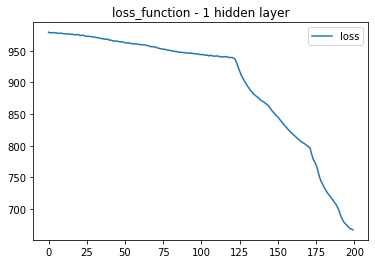

In [119]:
# Plot the train and test loss function
plt.plot(model_1.history["loss"])
plt.title("loss_function - 1 hidden layer")
plt.legend(["loss"])
plt.show()

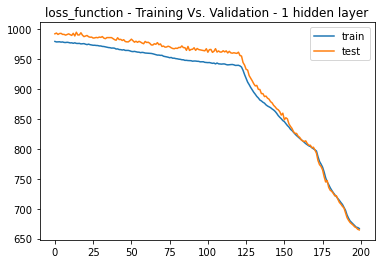

In [122]:
# Train vs test for shallow net
plt.plot(model_1.history["loss"])
plt.plot(model_1.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - 1 hidden layer")
plt.legend(["train", "test"])
plt.show()

In [131]:
print(model_1.history['loss'][-1])

666.9364013671875


In [120]:
# Define the model - deep neural net
number_input_features = 15
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 8

nn = Sequential()
# First hidden layer
nn.add(
    Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)
# Second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))
# Output layer
nn.add(Dense(units=1, activation="linear"))

In [121]:
# Compile model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# Fit the model
model_2 = nn.fit(X_train_scaled, y_train, validation_split=0.3, epochs=200)

Epoch 1/200
1680/1680 [==============================] - 3s 2ms/step - loss: 5435.4600 - mse: 5435.4600 - val_loss: 1589.6024 - val_mse: 1589.6024
Epoch 2/200
1680/1680 [==============================] - 3s 2ms/step - loss: 1427.0192 - mse: 1427.0192 - val_loss: 1334.5126 - val_mse: 1334.5126
Epoch 3/200
1680/1680 [==============================] - 3s 2ms/step - loss: 1292.1620 - mse: 1292.1620 - val_loss: 1271.0304 - val_mse: 1271.0304
Epoch 4/200
1680/1680 [==============================] - 3s 2ms/step - loss: 1247.6205 - mse: 1247.6205 - val_loss: 1240.8561 - val_mse: 1240.8561
Epoch 5/200
1680/1680 [==============================] - 3s 2ms/step - loss: 1219.8472 - mse: 1219.8472 - val_loss: 1211.8525 - val_mse: 1211.8525
Epoch 6/200
1680/1680 [==============================] - 3s 2ms/step - loss: 1195.3567 - mse: 1195.3567 - val_loss: 1191.9713 - val_mse: 1191.9713
Epoch 7/200
1680/1680 [==============================] - 3s 2ms/step - loss: 1177.3990 - mse: 1177.3990 - val_loss: 11

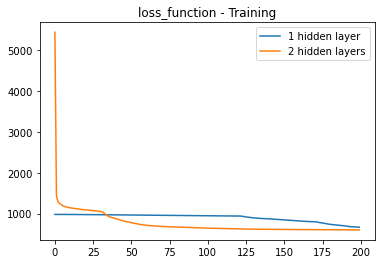

In [127]:
plt.plot(model_1.history["loss"])
plt.plot(model_2.history["loss"])
plt.title("loss_function - Training")
plt.legend(["1 hidden layer", "2 hidden layers"])
plt.show()

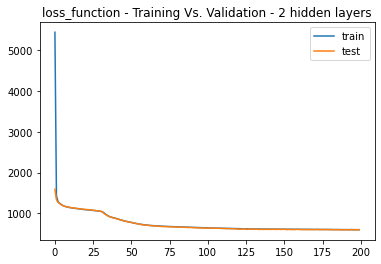

In [129]:
# Train vs test for deep net
plt.plot(model_2.history["loss"])
plt.plot(model_2.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - 2 hidden layers")
plt.legend(["train", "test"])
plt.show()

In [133]:
print(model_2.history['loss'][-1])

599.4967041015625


In [134]:
 # Save model as JSON
nn_json = nn.to_json()
file_path = Path("../Resources/model_2.json")
with open(file_path, "w") as json_file:
    json_file.write(nn_json)

# Save weights
file_path = "../Resources/model_2.h5"
nn.save_weights(file_path)

In [135]:
# Load the model to predict values
from tensorflow.keras.models import model_from_json

# Load json and create model
file_path = Path("../Resources/model_2.json")
with open(file_path, "r") as json_file:
    model_json = json_file.read()
loaded_model_2 = model_from_json(model_json)

# Load weights into new model
file_path = "../Resources/model_2.h5"
loaded_model_2.load_weights(file_path)

In [136]:
# Predict values using the testing data
from sklearn.metrics import mean_squared_error

y_pred = loaded_model_2.predict(X_test_scaled)

In [139]:
 # Evaluate the model with the MSE metric
print(mean_squared_error(y_test, y_pred))

588.1642924760662


In [140]:
# Make some predictions with the loaded model
Results = pd.DataFrame(y_test)
Results.columns=['adr']
Results["Predicted Value"] = y_pred
Results['Diff'] = Results['Predicted Value'] - Results.adr
Results

,adr,Predicted Value,Diff
0,80.0,94.313324,14.313324
1,90.0,83.636414,-6.363586
2,80.0,79.156158,-0.843842
3,60.0,73.473694,13.473694
4,90.0,76.414932,-13.585068
5,140.0,121.131248,-18.868752
6,80.0,106.400284,26.400284
7,80.0,93.599991,13.599991
8,110.0,105.906540,-4.093460
9,90.0,79.620209,-10.379791


In [1]:
Results.Diff.hvplot(kind = 'hist', title = 'Variance Between Actual and Predicted Values', ylabel = 'Instances', xlabel = "Variance")

NameError: name 'Results' is not defined

In [154]:
# Statistics for difference

print(Results.Diff.abs().mean())
print(Results.Diff.abs().max())
print(Results.Diff.abs().min())
print(Results.Diff.abs().std())

17.602713456071324
218.403564453125
0.0045013427734375
16.682914827577715
